In [1]:
%reset
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
MAX_FEATURES = 10000

In [5]:
%%time
# Get data.
(x_train, y_train), (x_test, y_test) = (
    tf.keras.datasets.imdb.load_data(num_words=MAX_FEATURES))

CPU times: user 4.59 s, sys: 265 ms, total: 4.85 s
Wall time: 4.86 s


### Simple embedding layer example

In [14]:
maxlen = 20
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(10000, 8, input_length=maxlen))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])
    model.summary()
    return model
    
model = get_model()
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_5 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 56us/step - loss: 0.7018 - acc: 0.5178 - val_loss: 0.6860 - val_acc: 0.5492
Epoch 2/10
20000/20000 [==============================] - 1s 45us/step - loss: 0.6638 - acc: 0.5990 - val_loss: 0.6498 - val_acc: 0.6154
Epoch 3/10
20000/20000 [==============================] - 1s 45us/step - loss: 

### Embedding and simple recurrent layer (SimpleRNN).

In [21]:
maxlen = 500
batch_size = 32

input_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
input_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(10000, 32))
    model.add(tf.keras.layers.SimpleRNN(32))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])
    model.summary()
    return model

model = get_model()
history = model.fit(
    input_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

input_train shape: (25000, 500)
input_test shape: (25000, 500)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 20s 991us/step - loss: 0.6926 - acc: 0.5301 - val_loss: 0.6975 - val_acc: 0.5258
Epoch 2/10
20000/20000 [==============================] - 20s 975us/step - loss: 0.6563 - acc: 0.5995 - val_loss: 0.6855 - val_acc: 0.5746
Epoch 3/10

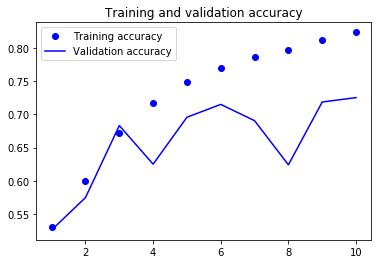

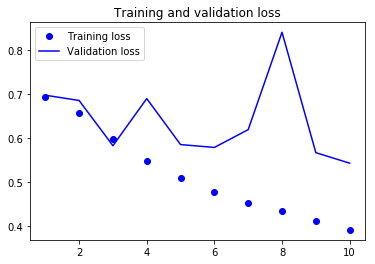

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Embedding and LSTM

In [30]:
maxlen = 500
batch_size = 32

input_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
input_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(10000, 32))
    model.add(tf.keras.layers.LSTM(32))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])
    model.summary()
    return model

model = get_model()
history = model.fit(
    input_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

input_train shape: (25000, 500)
input_test shape: (25000, 500)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.6719 - acc: 0.5752 - val_loss: 0.6591 - val_acc: 0.5946
Epoch 2/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.5956 - acc: 0.6781 - val_loss: 0.5785 - val_acc: 0.6934
Epoch 3/10
200

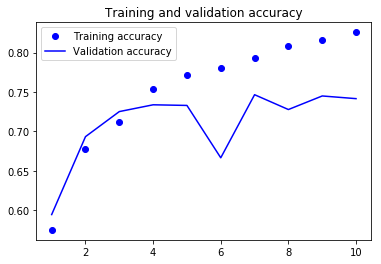

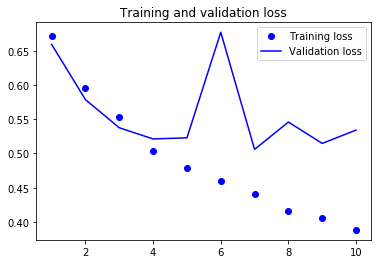

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()